In [44]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

## Analyse energy usage
With this notebook we get the energy usage from the CodeCarbon API. We present this in a nice graph and return all relevant statistics

In [15]:
RUN_ID = "ea889ba4-e800-49f2-bb47-50f6e27379c6"
API_URL = "https://api.codecarbon.io/"
MAX_RECORDS = 100

In [21]:
def api_call(url):
    headers = {'x_token' : 'fake-super-secret-token'}
    response = requests.get(url, headers=headers)
    return response

def get_emissions(run_id, page=1):
    result = []
    url = f"{API_URL}emissions/run/{run_id}?token=jessica&page={page}&size={MAX_RECORDS}"
    response = api_call(url).json()
    result += response['items']
    if(response['pages'] > page):
        result += get_emissions(run_id, page=page+1)
    return result

In [24]:
energy_data = get_emissions(RUN_ID)

In [42]:
df = pd.DataFrame.from_dict(energy_data) 
df['total_energy'] = df['cpu_energy'] + df['gpu_energy'] + df['ram_energy']
df['total_power'] = df['cpu_power'] + df['gpu_power'] + df['ram_power']
df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.drop(columns=['emissions_sum', 'emissions_rate', 'run_id', 'id'])


summary = {
    'gpu_energy (kWh)': df['gpu_energy'].sum(),
    'cpu_energy (kWh)': df['cpu_energy'].sum(),
    'ram_energy (kWh)': df['ram_energy'].sum(),
    'total_energy (kWh)': df['total_energy'].sum(),
    'duration (s)': df['duration'].sum(),
    'duration (m)': df['duration'].sum() / 60,
    'duration (h)': df['duration'].sum() / 60 / 60,
}
summary

{'gpu_energy (kWh)': 13.59801235979009,
 'cpu_energy (kWh)': 0.781493394196862,
 'ram_energy (kWh)': 0.8648117451817336,
 'total_energy (kWh)': 15.244317499168686,
 'duration (s)': 65954,
 'duration (m)': 1099.2333333333333,
 'duration (h)': 18.320555555555554}

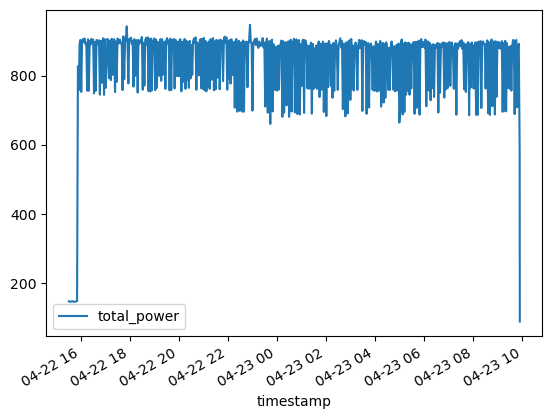

In [48]:
df.plot(x='timestamp', y='total_power')
plt.show()